In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading data
listing = pd.read_csv('data_Seattle/listings.csv')
calendar = pd.read_csv('data_Seattle/calendar.csv')

In [3]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
#Preprocess data 
listing['price'] = pd.to_numeric(listing['price'].str.replace("\$|,", '', regex=True))


listing['cleaning_fee'] = pd.to_numeric(listing['cleaning_fee'].str.replace("\$|,", '', regex=True))
listing['cleaning_fee'].fillna(0, inplace = True)

listing['price_total'] = listing['price'] + listing['cleaning_fee']

#Preprocess zipcode
listing.zipcode.replace('99\n98122', '98122', inplace=True)

In [7]:
#Get interested columns
interesting_fields = ["host_response_time", "host_response_rate", "host_neighbourhood", "zipcode", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "security_deposit", "price_total", "extra_people", "number_of_reviews", "review_scores_rating", "cancellation_policy"]
df = listing[interesting_fields]
print(df.isnull().sum())
df.head()

host_response_time       523
host_response_rate       523
host_neighbourhood       300
zipcode                    7
property_type              1
room_type                  0
accommodates               0
bathrooms                 16
bedrooms                   6
beds                       1
security_deposit        1952
price_total                0
extra_people               0
number_of_reviews          0
review_scores_rating     647
cancellation_policy        0
dtype: int64


,host_response_time,host_response_rate,host_neighbourhood,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,price_total,extra_people,number_of_reviews,review_scores_rating,cancellation_policy
0,within a few hours,96%,Queen Anne,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,NaN,85.0,$5.00,207,95.0,moderate
1,within an hour,98%,Queen Anne,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$100.00,190.0,$0.00,43,96.0,strict
2,within a few hours,67%,Queen Anne,98119,House,Entire home/apt,11,4.5,5.0,7.0,"$1,000.00",1275.0,$25.00,20,97.0,strict
3,NaN,NaN,Queen Anne,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,NaN,100.0,$0.00,0,NaN,flexible
4,within an hour,100%,Queen Anne,98119,House,Entire home/apt,6,2.0,3.0,3.0,$700.00,575.0,$15.00,38,92.0,strict


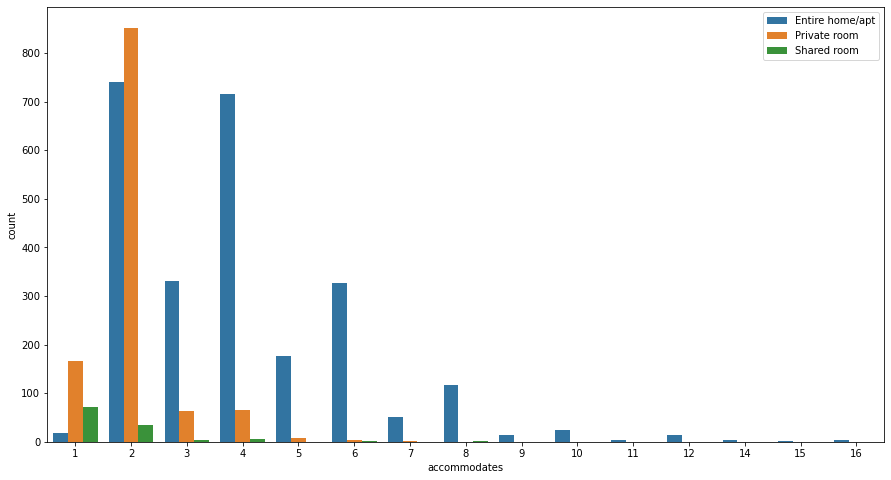

In [95]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x='accommodates',hue = 'room_type');
plt.legend(loc = 'upper right');

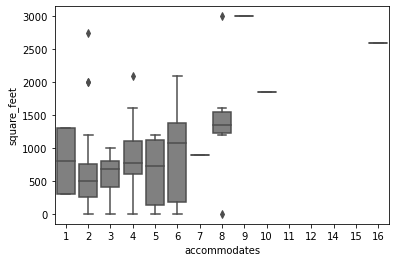

In [69]:
sns.boxplot(data=listing, x= 'accommodates', y='square_feet', color = 'grey');

In [73]:
listing.square_feet.isnull().sum()/listing.shape[0]

0.9745940282870613

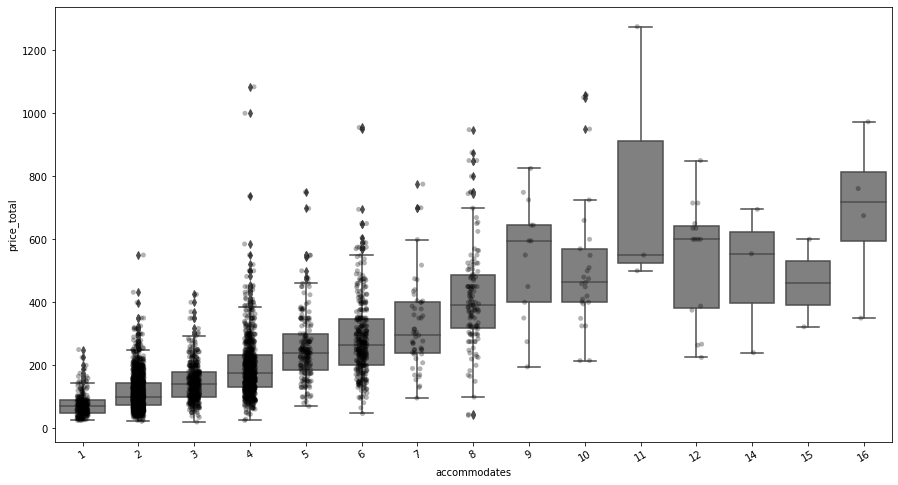

In [9]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df, x= 'accommodates', y='price_total', color='grey')
ax = sns.stripplot(data=df, x= 'accommodates', y='price_total', alpha = 0.3, color = 'black')
plt.xticks(rotation=30);

By checking the boxplot of price per accomodates, we can see the positive correlation between accomodates and price. Most available houses can accomodate 2 to 4 people, which is also suitable for most of families. Let's take a closer look at the houses that can accomodate 2-4 people.

In [79]:
#Remove outliers with extreme high price
familySizeHouses = df[(df['accommodates'].between(1,4)) & (df['price_total'] < 500)]

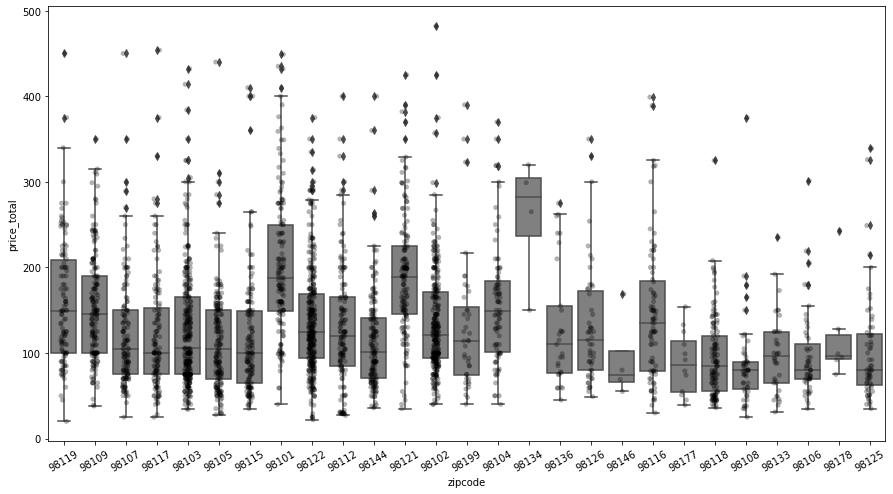

In [80]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', color='grey')
ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price_total', alpha = 0.3, color = 'black')
plt.xticks(rotation=30);


In [81]:
##Review rate handling

#familySizeHouses['review_scores_rating'] = familySizeHouses['review_scores_rating'].mask(familySizeHouses['review_scores_rating']<90, 'Poor Review')
familySizeHouses['review_scores_rating'] = np.where(familySizeHouses['review_scores_rating'] == 100, 'Good Review', 'Poor Review')


<ipython-input-81-05c9f557535e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  familySizeHouses['review_scores_rating'] = np.where(familySizeHouses['review_scores_rating'] == 100, 'Good Review', 'Poor Review')


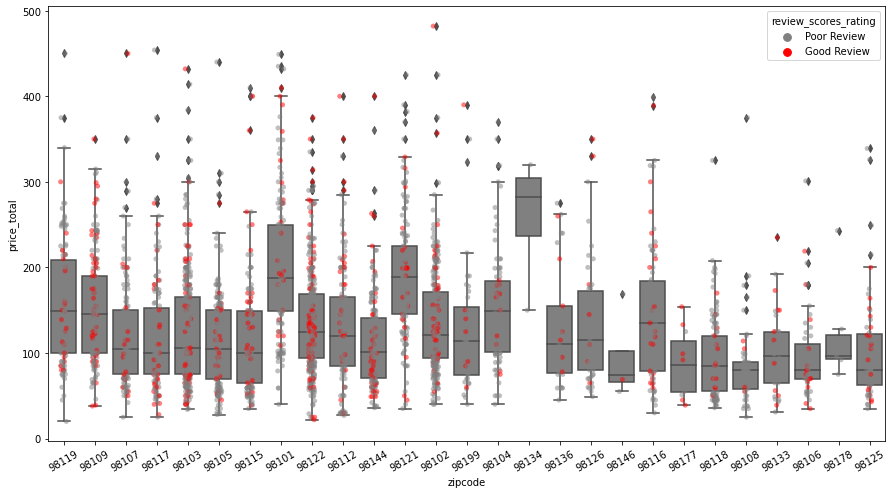

In [87]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', color = 'grey')
palette = {
    'Good Review': 'red',
    'Poor Review': 'grey'
}
ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price_total',hue="review_scores_rating", palette = palette, jitter=True, alpha = 0.5)
plt.xticks(rotation=30);

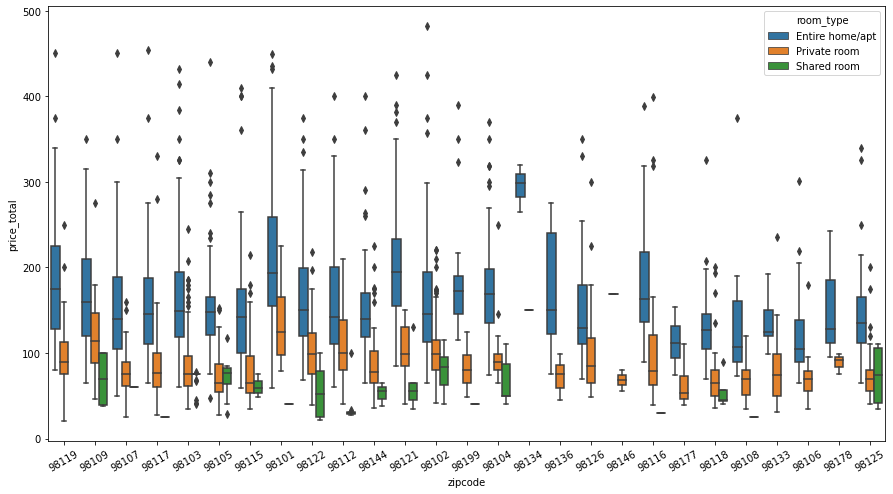

In [83]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', hue='room_type')
#ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price',hue="review_scores_rating", jitter=True, alpha = 0.5)
plt.xticks(rotation=30);


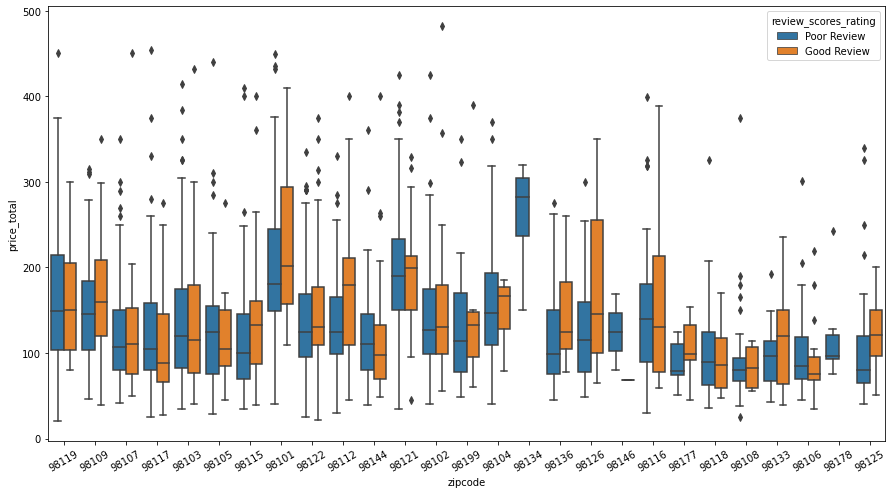

In [45]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', hue='review_scores_rating')
#ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price',hue="review_scores_rating", jitter=True, alpha = 0.5)
plt.xticks(rotation=30);

### When is the best time to visit Seattle with a better price?

In [16]:
calendar = pd.read_csv('data_Seattle/calendar.csv')

#Preprocessing data frame
calendar['price'] = pd.to_numeric(calendar['price'].str.replace("\$|,", '', regex=True))

calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


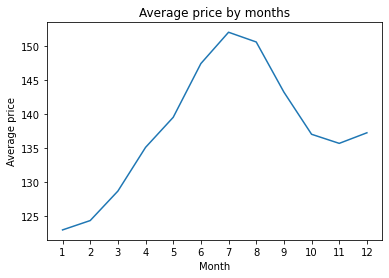

In [47]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar.groupby('month').price.agg('mean').plot()
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Month')
plt.ylabel('Average price')
plt.title('Average price by months');
#df.groupby('A').agg(

In [64]:
calendar.date.max()

'2017-01-02'

The average price is higher in summer time (June to August) and the cheapest is in Jan.